In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [ ]:
type(california)

sklearn.utils._bunch.Bunch

In [10]:
california.keys()
print(type(california.data), type(california.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
print(california.data.shape, california.target.shape)

(20640, 8) (20640,)


In [11]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [ ]:
y = data['Price']
X = data.drop('Price', axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


In [ ]:
y_pred = model.predict(X)
print(y_pred[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]


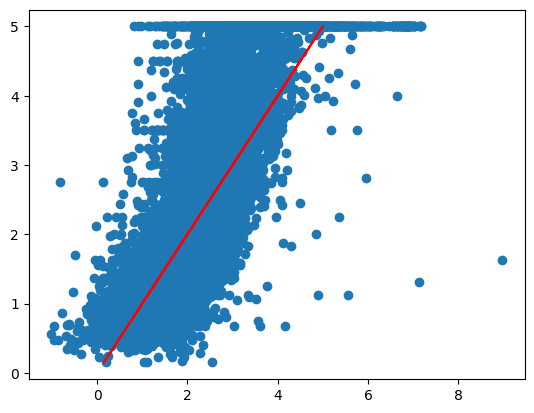

In [ ]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5).fit_transform(X)

In [ ]:
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

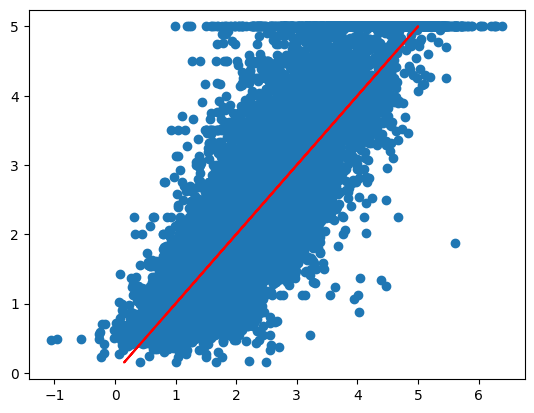

In [ ]:
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

In [ ]:
polynomial.score(poly, y)

0.7460745292501869

1. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [ ]:
import sklearn

y_predict = polynomial.predict(poly)

print('explained_variance: ', sklearn.metrics.explained_variance_score(y, y_predict))
print('max_error: ', sklearn.metrics.max_error(y, y_predict))
print('neg_mean_absolute_error: ', sklearn.metrics.mean_absolute_error(y, y_predict))
print('neg_mean_squared_error: ', sklearn.metrics.mean_squared_error(y, y_predict))
print('neg_root_mean_squared_error: ', sklearn.metrics.mean_squared_error(y, y_predict))
print('neg_median_absolute_error: ', sklearn.metrics.median_absolute_error(y, y_predict))
print('r2: ', sklearn.metrics.r2_score(y, y_predict))

print('neg_mean_absolute_percentage_error: ', sklearn.metrics.mean_absolute_percentage_error(y, y_predict))
print('d2_absolute_error_score: ', sklearn.metrics.d2_absolute_error_score(y, y_predict))

print('d2_pinball_score: ', sklearn.metrics.d2_pinball_score(y, y_predict))
print('d2_tweedie_score: ', sklearn.metrics.d2_tweedie_score(y, y_predict))

explained_variance:  0.7460745292501869
max_error:  4.002233279744948
neg_mean_absolute_error:  0.4164426417208405
neg_mean_squared_error:  0.338114536775328
neg_root_mean_squared_error:  0.338114536775328
neg_median_absolute_error:  0.30600579628415336
r2:  0.7460745292501869
neg_mean_absolute_percentage_error:  0.2459966560074296
d2_absolute_error_score:  0.5286664745279349
d2_pinball_score:  0.5286664745279349
d2_tweedie_score:  0.7460745292501869


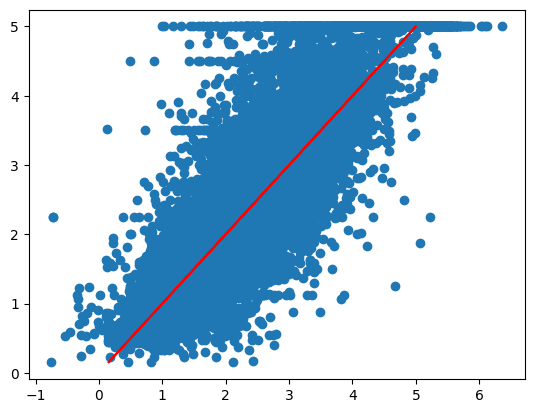

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3).fit_transform(X)
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

2. Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности. Рекомендуется исследовать следующие модели:

  I. Метод опорных векторов:

      a. Без ядра

      b. С гауссовым ядром

      c. С полиномиальным ядром

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

In [ ]:
X = data.iloc[:, 0:-1].values
y = data['Price'].values.transpose()

x_test = X[:17000]
y_test = y[:17000]
x_train = X[17000:]
y_train = y[17000:]

In [ ]:
svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')
svr_rbf.fit(x_train, y_train)
svr_lin.fit(x_train, y_train)
svr_poly.fit(x_train, y_train)

SVR(kernel='poly')

Score:
RDF score = 0.00466472777056226
Line kurnel score = 0.4745861279404583
Poly kurnel score= -0.31780964435567616


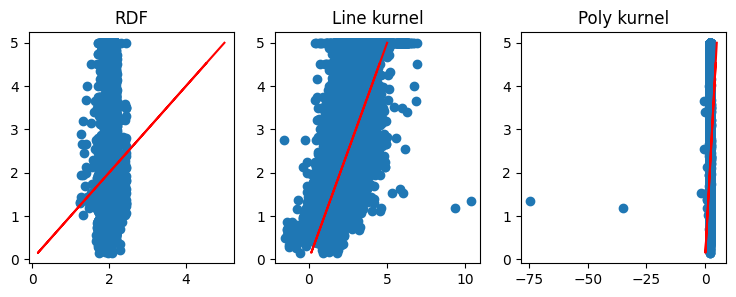

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

axs[0].scatter(svr_rbf.predict(x_test), y_test)
axs[0].plot(y_test, y_test, c = 'r')
axs[0].set_title("RDF")

axs[1].scatter(svr_lin.predict(x_test), y_test)
axs[1].plot(y_test, y_test, c = 'r')
axs[1].set_title("Line kurnel")

axs[2].scatter(svr_poly.predict(x_test), y_test)
axs[2].plot(y_test, y_test, c = 'r')
axs[2].set_title("Poly kurnel")

print(f'Score:\nRDF score = {svr_rbf.score(x_test, y_test)}\nLine kurnel score = {svr_lin.score(x_test, y_test)}\nPoly kurnel score= {svr_poly.score(x_test, y_test)}')

plt.show()

II. Метод ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

nbrs = KNeighborsRegressor()
nbrs.fit(x_train, y_train)


KNeighborsRegressor()

0.3977852064995573

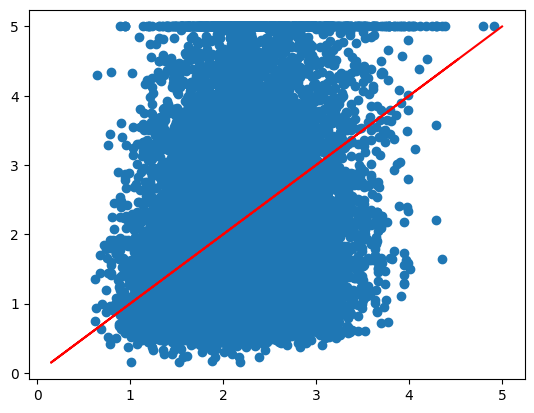

In [ ]:
plt.scatter(nbrs.predict(x_test), y_test)
plt.plot(y_test, y_test, c = 'r')

nbrs.score(x_train, y_train)

III. Многослойный перцептрон

0.3938710126859398


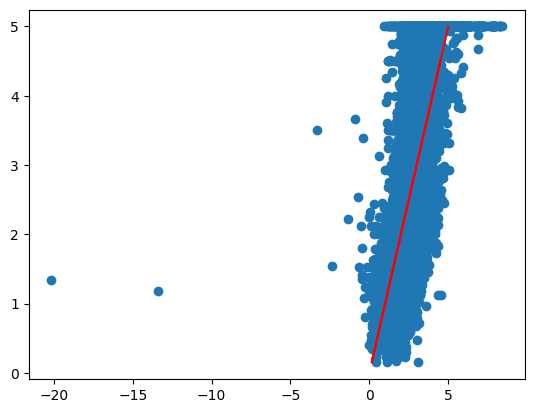

In [ ]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)
print(regr.score(x_test, y_test))

plt.scatter(regr.predict(x_test), y_test)
plt.plot(y_test, y_test, c = 'r')

IV. Дерево решений

0.16983073500163726


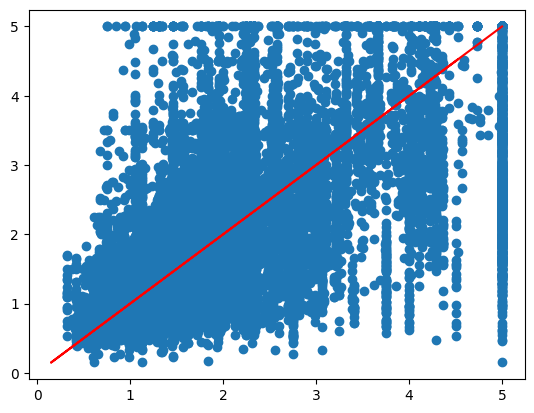

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train, y_train)
plt.scatter(clf.predict(x_test), y_test)
plt.plot(y_test, y_test, c = 'r')

print(clf.score(x_test, y_test))

V.
а) Гребневую регрессию


0.5393988086207098


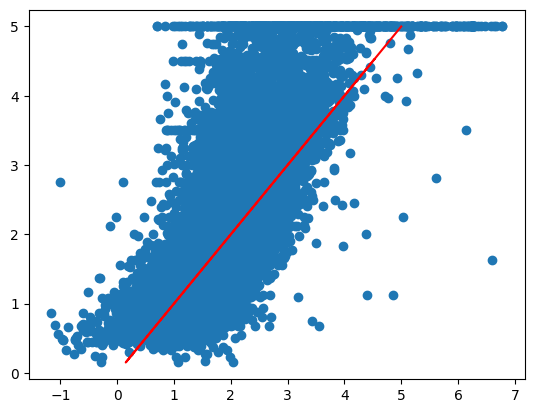

In [ ]:
from sklearn.linear_model import Ridge

clf = Ridge()
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

plt.scatter(clf.predict(x_test), y_test)
plt.plot(y_test, y_test, c = 'r')

b) Регрессию Лассо

0.5464025712328822


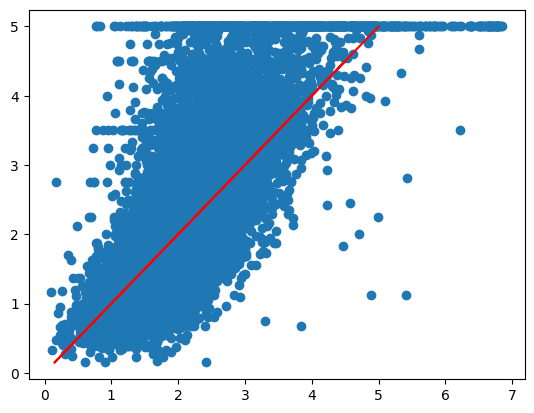

In [ ]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(x_train, y_train)
plt.scatter(reg.predict(x_test), y_test)
plt.plot(y_test, y_test, c = 'r')
print(reg.score(x_test, y_test))

c) Регрессию ElasticNet

0.4354385805352061


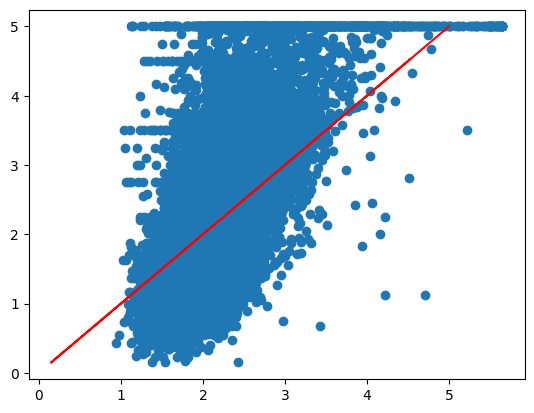

In [ ]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet()
regr.fit(x_train, y_train)

plt.scatter(regr.predict(x_test), y_test)
plt.plot(y_test, y_test, c = 'r')

print(regr.score(x_test, y_test))

d) Случайный лес

0.525710137258788


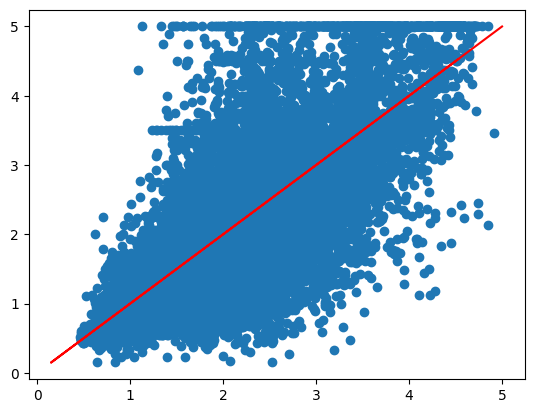

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(x_train, y_train)

plt.scatter(regr.predict(x_test), y_test)
plt.plot(y_test, y_test, c = 'r')

print(regr.score(x_test, y_test))

e) Беггинг

0.476287380233097


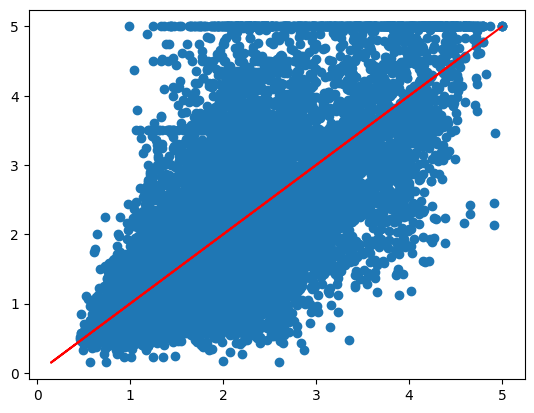

In [ ]:
from sklearn.ensemble import BaggingRegressor

bagged_trees = BaggingRegressor()

bagged_trees.fit(x_train, y_train)

plt.scatter(bagged_trees.predict(x_test), y_test)
plt.plot(y_test, y_test, c = 'r')

print(bagged_trees.score(x_test, y_test))

3. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [8]:
def learning(x_test, y_test, x_train, y_train):
  #Linear regression
  model = LinearRegression()
  model.fit(x_train, y_train)
  print("Linear regression = ", model.score(x_test, y_test))

  #Polynomial regression
  poly = PolynomialFeatures(5)
  poly.fit(x_train)
  poly = poly.transform(x_train)
  polynomial = LinearRegression()
  polynomial.fit(poly, y_train)
  print("Polynomial regression = ", polynomial.score(poly, y_train))

  #RBF Gaussian nuclear function
  svr_rbf = SVR(kernel = "rbf")
  svr_rbf.fit(x_train, y_train)
  print("Gaussian nuclear function = ", svr_rbf.score(x_test, y_test))

  #LINEAR linear nuclear function
  svr_lin = SVR(kernel = "linear")
  svr_lin.fit(x_train, y_train)
  print("Linear nuclear function = ", svr_lin.score(x_test, y_test))

  #POLY Multikin Key Nuclear Function
  svr_poly = SVR(kernel = "poly")
  svr_poly.fit(x_train, y_train)
  print("Multikin Key Nuclear Function = ", svr_poly.score(x_test, y_test))

  #KNeighborsRegressor
  nbrs = KNeighborsRegressor()
  nbrs.fit(x_train, y_train)
  print("KNeighborsRegressor = ", nbrs.score(x_test, y_test))

  #MLPRegressor
  regr = MLPRegressor()
  regr.fit(x_train, y_train)
  print("MLPRegressor = ", regr.score(x_test, y_test))

  #Tree
  clf = tree.DecisionTreeRegressor().fit(x_train, y_train)
  print("Tree = ", clf.score(x_test, y_test))

  #Ridge
  clf = Ridge(alpha=1.0).fit(x_train, y_train)
  print("Ridge = ", clf.score(x_test, y_test))

  #Lasso
  reg = linear_model.Lasso(alpha = 0.1).fit(x_train, y_train)
  print("Lasso = ", reg.score(x_test, y_test))

  #ElasticNet
  regr = ElasticNet()
  regr.fit(x_train, y_train)
  print("ElasticNet = ", regr.score(x_test, y_test))

  #RandomForestRegressor
  regr = RandomForestRegressor().fit(x_train, y_train)
  print("RandomForestRegressor = ", regr.score(x_test, y_test))

  #BaggingRegressor
  bagged_trees = BaggingRegressor().fit(x_train, y_train)
  print("BaggingRegressor = ", bagged_trees.score(x_test, y_test))

In [ ]:
X = data.iloc[:, 0:-1].values
y = data["Price"].values.transpose()

x_test = X[:17000]
y_test = y[:17000]
x_train = X[17000:]
y_train = y[17000:]

learning(x_test, y_test, x_train, y_train)

Linear regression =  0.5393865744861013
Polynomial regression =  0.835303602215608
Gaussian nuclear function =  0.00466472777056226
Linear nuclear function =  0.4745861279404583
Multikin Key Nuclear Function =  -0.31780964435567616
KNeighborsRegressor =  -0.04737087292736453
MLPRegressor =  0.01510043446049214
Tree =  0.18793536032641034
Ridge =  0.5393988086207098
Lasso =  0.5464025712328822
ElasticNet =  0.4354385805352061
RandomForestRegressor =  0.5222716745578451
BaggingRegressor =  0.46893288742097994


4. Повторите полностью анализ для другого набора данных - встроенного в sklearn датасета diabetes.

In [1]:
from sklearn import datasets
from matplotlib import pyplot as plt

In [2]:
diabetes = datasets.load_diabetes(as_frame=True)

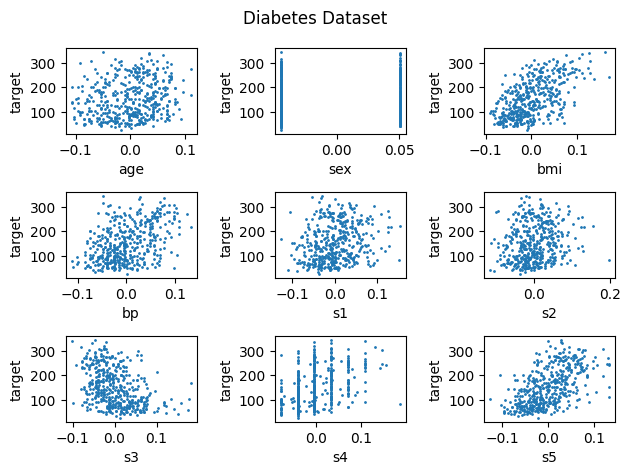

In [3]:
features = diabetes['feature_names']

fig, axs = plt.subplots(3, 3)
fig.suptitle('Diabetes Dataset')
for i in range(3):
    for j in range(3):
        n = j + i * 3
        feature = features[n]
        axs[i, j].scatter(diabetes['data'][feature], diabetes['target'], s=1)
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('target')
plt.tight_layout()
plt.show()

In [6]:
data = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
data['Price'] = diabetes.target

y = data['Price']
X = data.drop('Price', axis=1)

X = data.iloc[:, 0:-1].values
y = data['Price'].values.transpose()

x_test = X[:221]
y_test = y[:221]
x_train = X[221:]
y_train = y[221:]


In [11]:
learning(x_test, y_test, x_train, y_train)

Linear regression =  0.4599896995003091
Polynomial regression =  1.0
Gaussian nuclear function =  0.14137422004117584
Linear nuclear function =  0.013568462344356602
Multikin Key Nuclear Function =  0.2019874318106345
KNeighborsRegressor =  0.40658595493858307


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor =  -3.082936351293667
Tree =  -0.02537108486592543
Ridge =  0.36063711904838935
Lasso =  0.447498322661532
ElasticNet =  -0.0018554805947657016
RandomForestRegressor =  0.4217269702998281
BaggingRegressor =  0.3725556275277023
